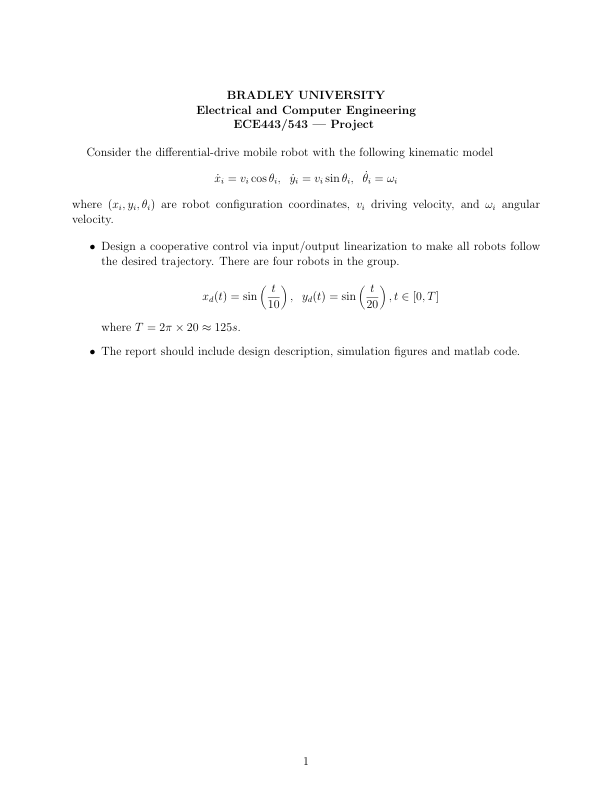

In [1]:
import fitz  # PyMuPDF
from IPython.display import display, Image

def display_pdf_images(pdf_path):
    # Open the PDF file
    pdf_document = fitz.open(pdf_path)
    
    # Display each page as an image
    for page_num in range(pdf_document.page_count):
        page = pdf_document.load_page(page_num)
        image_bytes = page.get_pixmap().tobytes()
        display(Image(data=image_bytes))

# Call the function with the path to your PDF file
display_pdf_images("project.pdf")

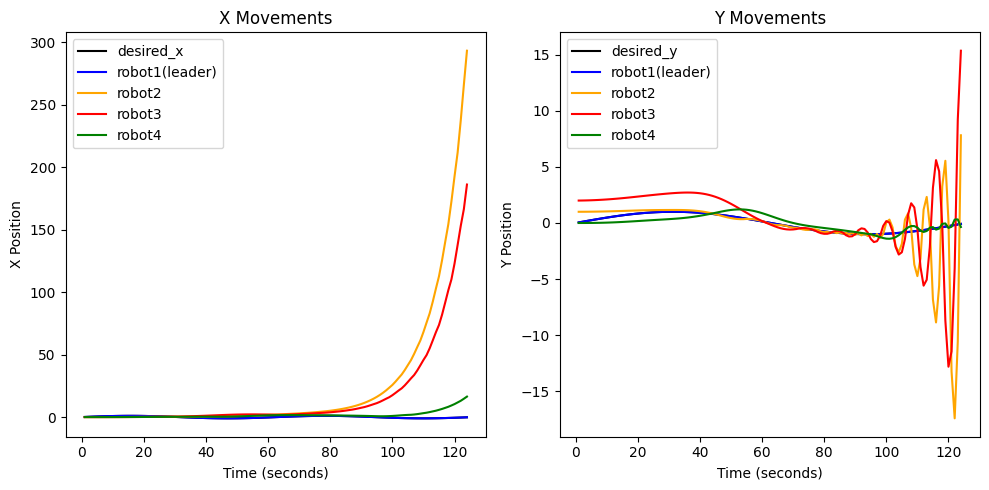

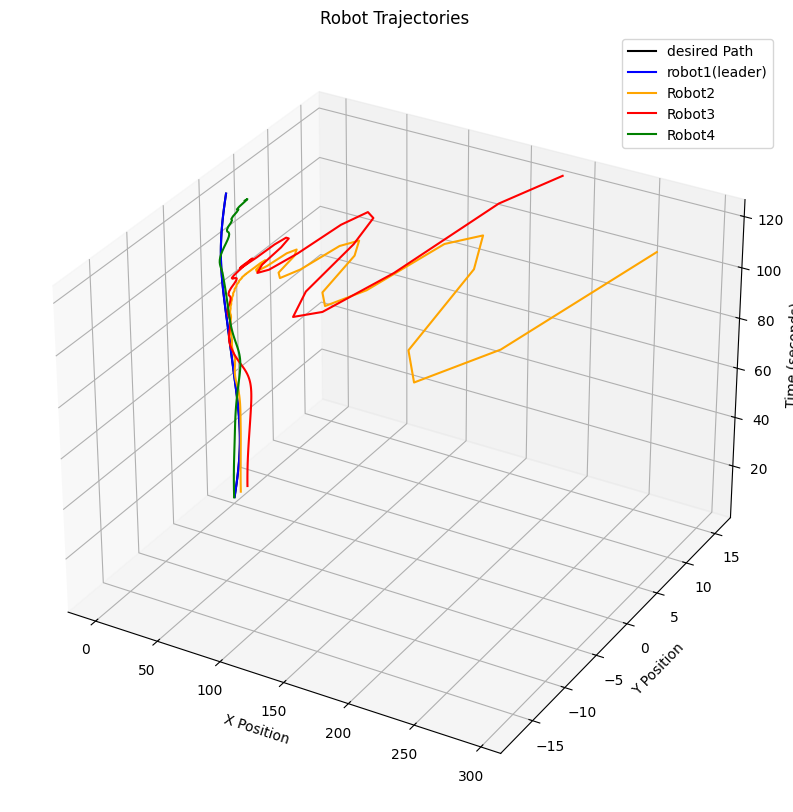

In [131]:
import matplotlib.pyplot as plt
import numpy as np

#generate time vector
t=  np.arange(1, 125) 

#desired x position
def x_desired(w):
    return np.sin(w/10)

#desired y position
def y_desired(w):
    return np.sin(w/20)

#define robot to be controlled as a class
class Robot:
    def __init__(self, x=0, y=0, theta=0, v=0, omega=0, leader = False):
        self.x =x
        self.y =y
        self.theta = theta
        self.v=v
        self.omega = omega
        self.leader = leader


     #Define cooperative controll algorithm for robots
    def update_pose(self, t):
        if self.leader:
            desired_x = x_desired(t)
            desired_y = y_desired(t)
            self.x = desired_x
            self.y = desired_y
            
        else:
            leader_x, leader_y = x_desired(t), y_desired(t)
             
            # Error terms for control law
            e_x = leader_x - self.x
            e_y = leader_y - self.y

            # Control gain (adjust as needed)
            k = 0.001 
           

            # Calculate desired angle to face the leader
            desired_angle = np.arctan2(e_y, e_x)

            # Calculate error in orientation
            e_theta = desired_angle - self.theta

            # Update velocities based on control law
            self.v = np.sqrt(e_x**2 + e_y**2) * k
            self.omega = k * e_theta

            # Update robot's pose with respects to the leader
            self.theta += self.omega * t
            self.x += self.v * np.cos(self.theta) * t
            self.y += self.v * np.sin(self.theta) * t
          
        
#simulate movement on the robot obj
def moveRobot(robot, t):
    robot_x_traj = []
    robot_y_traj = []
    robot_theta_traj = []
    
    for time in t:
        robot.update_pose(time)
        robot_x_traj.append(robot.x)
        robot_y_traj.append(robot.y)
        robot_theta_traj.append(robot.theta)
    return robot_x_traj, robot_y_traj, robot_theta_traj

def main():

    #instantiate robots
    robot1 = Robot(x=0, y=0, theta=0, v=1, omega=0.1, leader=True)
    robot2 = Robot(x=0, y=1, theta=np.pi/4, v=1, omega=0.2)
    robot3 = Robot(x=0, y=2, theta=np.pi/2, v=1, omega=0.15)
    robot4 = Robot(x=0, y=0, theta=np.pi/3, v=1, omega=0.18)

    #desired paths
    x_des = x_desired(t)
    y_des = y_desired(t)
    
    #move the robots
    robot1_x , robot1_y, robot1_theta = moveRobot(robot1,t)
    robot2_x , robot2_y, robot2_theta = moveRobot(robot2,t)
    robot3_x , robot3_y, robot3_theta = moveRobot(robot3,t)
    robot4_x , robot4_y, robot4_theta = moveRobot(robot4,t)
   
    #plot movement of robots compared to desired position in x and y directions
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)

    #plot x
    plt.plot(t, x_des, color='black',label='desired_x')
    plt.plot(t, robot1_x,color='blue', label='robot1(leader)')
    plt.plot(t, robot2_x,color='orange', label='robot2')
    plt.plot(t, robot3_x,color='red', label='robot3')
    plt.plot(t, robot4_x,color='green', label='robot4')
    plt.title('X Movements')
    plt.xlabel('Time (seconds)')
    plt.ylabel('X Position')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(t, y_des, color='black',label='desired_y')
    plt.plot(t, robot1_y,color='blue', label='robot1(leader)')
    plt.plot(t, robot2_y,color='orange', label='robot2')
    plt.plot(t, robot3_y,color='red', label='robot3')
    plt.plot(t, robot4_y,color='green', label='robot4')
    plt.title('Y Movements')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Y Position')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 3D plot of robot trajectories
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(x_des, y_des, t , color ='black', label='desired Path')
    ax.plot(robot1_x, robot1_y, t,color='blue', label='robot1(leader)')
    ax.plot(robot2_x, robot2_y, t,color='orange', label='Robot2')
    ax.plot(robot3_x, robot3_y, t, color='red',label='Robot3')
    ax.plot(robot4_x, robot4_y, t, color='green',label='Robot4')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Time (seconds)')
    ax.set_title('Robot Trajectories')
    ax.legend()
    plt.show()


if __name__=="__main__":
    main()
